In [1]:
# ! pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
# importing necessary library

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the csv dataset
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# extracting all the NULL values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# df.drop(columns=['Cabin'], inplace=True)

In [7]:
# all columns of the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# creating new column of familt size which is the addition of columns - 'SibSp' and 'Parch'
df['familySize'] = df['SibSp'] + df['Parch'] + 1

In [9]:
# droping the SibSp and Parch columns
df.drop(columns=['SibSp', 'Parch'], inplace=True)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,familySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


In [11]:
# extracting Title of the name 
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0])
df.drop(columns=['Name'], inplace=True)

In [12]:
# printing all unique title
df['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

Text(0, 0.5, 'Fare')

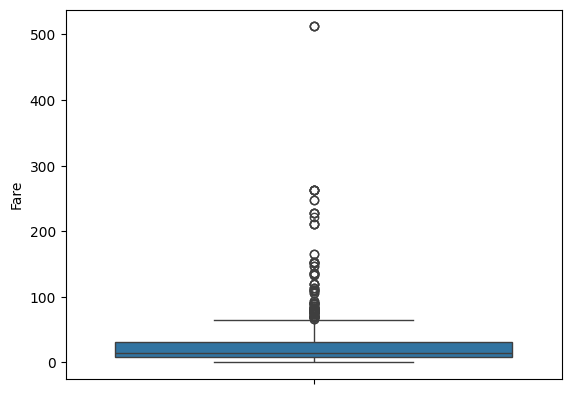

In [13]:
# ploting scotter plot to identify the outliers
sns.boxplot(y=df['Fare'])
plt.ylabel('Fare')

In [14]:
df.shape

(891, 11)

In [15]:
# removing the outliers based on the Inter Quatile Range
Q1 = df['Fare'].quantile(0.25)
Q2 = df['Fare'].quantile(0.75)

IQR = Q2 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q2 + 1.5 * IQR

df = df[(df['Fare'] <= upper_bound) & (df['Fare'] >= lower_bound)]

df.shape

(775, 11)

Text(0, 0.5, 'Fare')

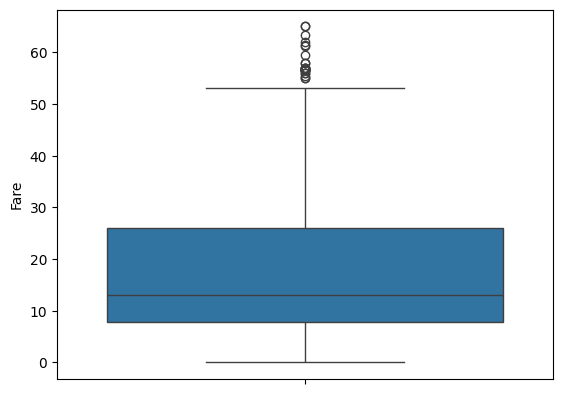

In [16]:
# checking if outliers is removed or not
sns.boxplot(y=df['Fare'])
plt.ylabel('Fare')


In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'familySize', 'Title'],
      dtype='object')

In [18]:
# pipeline for handling missing value and standard scaling in numerical columns

numerical_columns = ['Pclass', 'Age', 'Fare', 'familySize']

numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler()),
    ]
)

In [19]:
# pipeline for handling missing data and encoding in categorical columns

categorical_columns = ['Sex', 'Embarked', 'Title']

categorical_transformer = Pipeline(
    steps = [
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore')),
    ]
)

In [20]:
# creating preprocessing column transformer for handling the numerical columns and categorical columns 

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

In [21]:
# creating pipeline which preprocess and train the model

pipe = Pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('classifier', LogisticRegression())
    ]
)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,familySize,Title
0,1,0,3,male,22.0,A/5 21171,7.2500,NaN,S,2,Mr
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,female,35.0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,male,35.0,373450,8.0500,NaN,S,1,Mr
5,6,0,3,male,NaN,330877,8.4583,NaN,Q,1,Mr


In [23]:
# creating variable X and y for Train Test Split
X = df.drop(columns=['Survived'])
y = df['Survived']

In [24]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [25]:
X_train.shape

(697, 10)

In [26]:
# training the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'Fare',
                                                   'familySize']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked',
                                                   'Title'])])),
                ('classifier', LogisticRegression())])

In [27]:
# predicting on test dataset
y_pred = pipe.predict(X_test)

In [28]:
# calculating accuracy score
print("The Accuracy score is: ", accuracy_score(y_test, y_pred) * 100)

The Accuracy score is:  84.61538461538461


In [29]:
# calculating cross validation score
print("The Cross Validation score is: ", cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=10, scoring='accuracy').mean() * 100
)

The Cross Validation score is:  80.90683229813665


### # exporting model in pickle file


In [30]:
import pickle

In [31]:
# exporting model
pickle.dump(pipe, open('../model/model.pkl', 'wb'))

In [32]:
# importing model
model = pickle.load(open('../model/model.pkl', 'rb'))

In [33]:
input_data = pd.DataFrame({
    'Pclass': [3],
    'Age': [25],
    'Fare': [7.25],
    'familySize': [1],  # SibSp=0, Parch=0, so familySize = 1
    'Sex': ['male'],
    'Embarked': ['S'],
    'Title': [' Mr']
})

# Predicting using the loaded model
prediction = model.predict(input_data)
print("Prediction:", prediction)


Prediction: [0]
